<a href="https://colab.research.google.com/github/liamglennon/FYP/blob/main/FYPCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Radiation Patterns

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import matplotlib

# --- Load Data (After Uploading to Colab) ---
from google.colab import files
uploaded = files.upload()

# Replace with actual filenames after uploading
df1 = pd.read_csv("Liam2_t20dbm_rightone.csv", names=["Angle", "Signal Strength 1"], skiprows=1)
df2 = pd.read_csv("Liam2_t20dbm_rightone2.csv", names=["Angle", "Signal Strength 2"], skiprows=1)
df3 = pd.read_csv("Liam1_t20dbm_rightone.csv", names=["Angle", "Signal Strength 3"], skiprows=1)

# --- Merge on Angle ---
df = pd.merge(df1, df2, on="Angle")
df = pd.merge(df, df3, on="Angle")

# --- Convert angle to radians for polar plotting ---
angles = np.radians(df["Angle"])
s1 = df["Signal Strength 1"]
s2 = df["Signal Strength 2"]
s3 = df["Signal Strength 3"]

# --- Interactive Polar Plot ---
def plot_polar(rmin, rmax):
    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))
    ax.plot(angles, s1, label="Antenna 1", linestyle='-', marker='.')
    ax.plot(angles, s2, label="Antenna 2", linestyle='-', marker='.')
    ax.plot(angles, s3, label="Antenna 3", linestyle='-', marker='.')

    ax.set_theta_zero_location('N')
    ax.set_theta_direction(-1)
    ax.set_title(f"Antenna Radiation Patterns ({int(rmin)} dB to {int(rmax)} dB)")
    ax.set_rlim(rmin, rmax)
    ax.set_yticks(np.arange(rmin, rmax + 1, 10))
    ax.legend(loc="upper right")
    plt.show()

# Create sliders
interact(plot_polar,
         rmin=FloatSlider(value=-100, min=-120, max=-40, step=1, description='Min dB'),
         rmax=FloatSlider(value=-60, min=-120, max=-40, step=1, description='Max dB'));




Saving Liam1_t20dbm_rightone.csv to Liam1_t20dbm_rightone (6).csv
Saving Liam2_t20dbm_rightone.csv to Liam2_t20dbm_rightone (6).csv
Saving Liam2_t20dbm_rightone2.csv to Liam2_t20dbm_rightone2 (6).csv


interactive(children=(FloatSlider(value=-100.0, description='Min dB', max=-40.0, min=-120.0, step=1.0), FloatS…

Friis


Saving Liam1_t20dbm_rightone.csv to Liam1_t20dbm_rightone (4).csv
Saving Liam2_t20dbm_rightone.csv to Liam2_t20dbm_rightone (4).csv
Saving Liam2_t20dbm_rightone2.csv to Liam2_t20dbm_rightone2 (4).csv
Expected received power (Friis): -29.67 dBm

Antenna 1:
  Avg Measured Power: -67.23 dBm
  Delta vs. Friis:    -37.56 dB
Antenna 2:
  Avg Measured Power: -66.95 dBm
  Delta vs. Friis:    -37.28 dB
Antenna 3:
  Avg Measured Power: -68.21 dBm
  Delta vs. Friis:    -38.54 dB


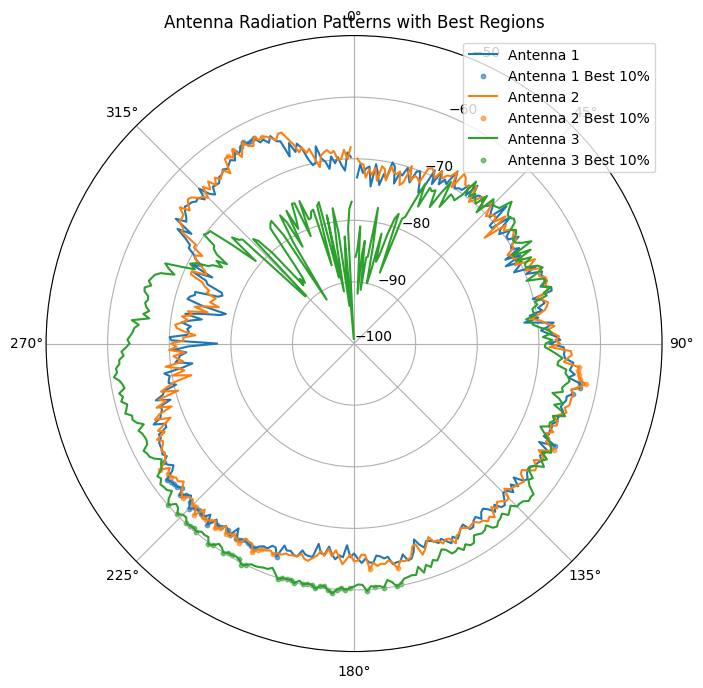

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files

# --- Upload CSVs ---
uploaded = files.upload()

# --- Load and Merge Data ---
df1 = pd.read_csv("Liam2_t20dbm_rightone.csv", names=["Angle", "Signal Strength 1"], skiprows=1)
df2 = pd.read_csv("Liam2_t20dbm_rightone2.csv", names=["Angle", "Signal Strength 2"], skiprows=1)
df3 = pd.read_csv("Liam1_t20dbm_rightone.csv", names=["Angle", "Signal Strength 3"], skiprows=1)

df = pd.merge(df1, df2, on="Angle")
df = pd.merge(df, df3, on="Angle")

# --- Corrected Friis Parameters ---
pt = 30 - 7.2     # Transmit power after cable loss (dBm)
gt = 2            # Transmit antenna gain (dBi)
gr = 11.6         # Receive antenna gain (dBi)
freq = 6e9        # Frequency (Hz)
d = 8             # Distance (m)

# --- Friis Equation ---
def friis_pr(pt_dbm, gt_dbi, gr_dbi, freq_hz, distance_m):
    c = 3e8
    wavelength = c / freq_hz
    path_loss_db = 20 * np.log10(4 * np.pi * distance_m / wavelength)
    pr_dbm = pt_dbm + gt_dbi + gr_dbi - path_loss_db
    return pr_dbm

expected_power = friis_pr(pt, gt, gr, freq, d)
print(f"Expected received power (Friis): {expected_power:.2f} dBm\n")

# --- Polar Plot & Analysis ---
angles = np.radians(df["Angle"])

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(8, 8))

for i in range(1, 4):
    signal = df[f"Signal Strength {i}"]
    ax.plot(angles, signal, label=f"Antenna {i}")

    # Average and delta
    avg_power = signal.mean()
    delta = avg_power - expected_power
    print(f"Antenna {i}:")
    print(f"  Avg Measured Power: {avg_power:.2f} dBm")
    print(f"  Delta vs. Friis:    {delta:.2f} dB")

    # Highlight best 10% of values
    threshold = np.percentile(signal, 90)
    best_angles = angles[signal >= threshold]
    best_values = signal[signal >= threshold]
    ax.scatter(best_angles, best_values, s=10, label=f"Antenna {i} Best 10%", alpha=0.6)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_title("Antenna Radiation Patterns with Best Regions")
ax.set_rlim(-100, -50)
ax.set_yticks(np.arange(-100, -49, 10))
ax.legend(loc="upper right")
plt.show()

